In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'sans-serif'

In [2]:
finz_ko_df = pd.read_csv('../data/finz_mo_kd_summary.txt', sep='\t')
finz_ko_df = finz_ko_df.merge(pd.read_csv('../data/misc/non_finz_genes.txt', sep='\t'), left_on='gene', right_on='Gene stable ID', how='outer')

labels = []
for i, row in finz_ko_df.iterrows():
    if row.genetype == 'non-finz gene':
        labels.append('Non-FiNZ gene')
    elif row.genetype == 'TE':
        labels.append(row.teclass)
    elif row.genetype == 'finz':
        if row.cluster == 'Maternally deposited':
            labels.append(row.cluster.replace(' ', '\n'))
        else:
            labels.append(row.cluster)
    else:
        print(row)
finz_ko_df['labels'] = labels    

# chr4_enrichment = pd.read_csv('/Users/jonwells/Desktop/chr4_enrichment.txt', sep='\t', header=None, names=['gene', 'enrichment'])
# finz_ko_df = finz_ko_df.merge(chr4_enrichment, on='gene', how='outer')

finz_ko_df.loc[finz_ko_df.tefam.isin(['DIRS', 'Ngaro']), 'tefam'] = 'DIRS/Ngaro'
finz_ko_df.tefam = finz_ko_df.tefam.apply(lambda x: x.strip('?') if (type(x) == str) else x)

finz_ko_df['significant'] = False
finz_ko_df.loc[(finz_ko_df.padj < 0.05) & (abs(finz_ko_df.log2FoldChange) >= 0.32), 'significant'] = True

finz_ko_df['neg_log_pvalue'] = -np.log10(finz_ko_df['pvalue'])
finz_ko_df['neg_log_padj'] = -np.log10(finz_ko_df['padj'])

print(finz_ko_df.head())
print(finz_ko_df.columns)

   gene     baseMean  log2FoldChange     lfcSE       stat        pvalue  \
0    g1  2722.601759        1.781479  0.140693  12.662188  9.579223e-37   
1   g10    62.585958        0.072846  0.510802   0.142612  8.865969e-01   
2  g101   577.444038        1.194281  0.190533   6.268096  3.654895e-10   
3  g102    42.566314        0.051972  0.579068   0.089751  9.284852e-01   
4  g103   687.513303        1.205507  0.171472   7.030336  2.060373e-12   

           padj     direction genetype  shieldLog2FoldChange  ...  length  \
0  1.525108e-33  up-regulated     finz             -0.883019  ...     NaN   
1  9.673336e-01  up-regulated     finz              0.261410  ...     NaN   
2  4.247415e-08  up-regulated     finz             -0.471492  ...     NaN   
3  9.804463e-01  up-regulated     finz             -0.365882  ...     NaN   
4  3.417000e-10  up-regulated     finz             -0.564487  ...     NaN   

  medlen  isltr  Gene stable ID Gene name Gene description labels significant  \
0    

In [3]:
print(len(finz_ko_df.loc[(finz_ko_df.genetype != 'TE') & (finz_ko_df.significant == True)]))
finz_ko_df.loc[(finz_ko_df.genetype != 'TE') & (finz_ko_df.significant == True), 'gene'].to_csv('/Users/jonwells/Desktop/test.txt', header=False, index=False)
print(finz_ko_df.loc[finz_ko_df.gene == 'ENSDARG00000035559'])

1214
                    gene     baseMean  log2FoldChange     lfcSE      stat  \
4781  ENSDARG00000035559  5718.995565       -0.012511  0.123063 -0.101663   

        pvalue     padj       direction       genetype  shieldLog2FoldChange  \
4781  0.919024  0.97708  down-regulated  non-finz gene             -0.463458   

      ...  length medlen  isltr      Gene stable ID Gene name  \
4781  ...     NaN    NaN    NaN  ENSDARG00000035559      tp53   

                                    Gene description         labels  \
4781  tumor protein p53 [Source:NCBI gene;Acc:30590]  Non-FiNZ gene   

     significant  neg_log_pvalue  neg_log_padj  
4781       False        0.036673       0.01007  

[1 rows x 38 columns]


In [4]:
print(len(finz_ko_df.loc[finz_ko_df.significant]))

print('TE enrichment')
a = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange > 0) & (finz_ko_df.significant) & (finz_ko_df.genetype == 'TE')])
b = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange < 0) & (finz_ko_df.significant) & (finz_ko_df.genetype == 'TE')])
c = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange > 0) & (finz_ko_df.significant) & (finz_ko_df.genetype != 'TE')])
d = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange < 0) & (finz_ko_df.significant) & (finz_ko_df.genetype != 'TE')])
print(np.array([[a, b], [c, d]]))
print(stats.fisher_exact([[a, b], [c, d]]))
print()

print('LTR enrichment')
a = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange > 0) & (finz_ko_df.significant) & (finz_ko_df.teclass == 'LTR')])
b = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange < 0) & (finz_ko_df.significant) & (finz_ko_df.teclass == 'LTR')])
c = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange > 0) & (finz_ko_df.significant) & (finz_ko_df.teclass != 'LTR')])
d = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange < 0) & (finz_ko_df.significant) & (finz_ko_df.teclass != 'LTR')])
print(np.array([[a, b], [c, d]]))
print(stats.fisher_exact([[a, b], [c, d]]))
print()

print('FiNZ enrichment')
a = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange > 0) & (finz_ko_df.significant) & (finz_ko_df.genetype == 'finz')])
b = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange < 0) & (finz_ko_df.significant) & (finz_ko_df.genetype == 'finz')])
c = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange > 0) & (finz_ko_df.significant) & (finz_ko_df.genetype != 'finz')])
d = len(finz_ko_df.loc[(finz_ko_df.log2FoldChange < 0) & (finz_ko_df.significant) & (finz_ko_df.genetype != 'finz')])
print(np.array([[a, b], [c, d]]))
print(stats.fisher_exact([[a, b], [c, d]]))

x = len(finz_ko_df.loc[(finz_ko_df.significant) & (finz_ko_df.log2FoldChange > 0)])
n = len(finz_ko_df.loc[finz_ko_df.significant])

p = stats.binom_test(x, n)
print(f'{x}\t{n}\t{p:.2e}\t{100*x/n:.1f}')

1318
TE enrichment
[[ 87  17]
 [698 516]]
(3.783246249789314, 6.057898343226391e-08)

LTR enrichment
[[ 63   7]
 [722 526]]
(6.556786703601108, 1.1723064022842777e-08)

FiNZ enrichment
[[184  31]
 [601 502]]
(4.957758574418979, 3.826895136792053e-19)
785	1318	4.08e-12	59.6


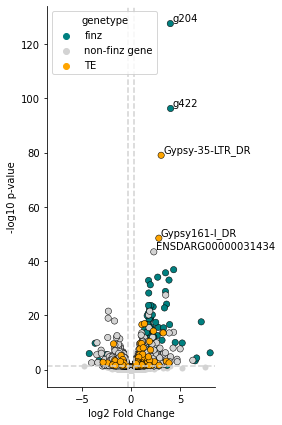

In [5]:
pval_thresh = -np.log10(0.05)
fig, ax = plt.subplots(figsize=(3, 7))
sns.scatterplot(data=finz_ko_df.loc[~finz_ko_df.significant],
                x='log2FoldChange',
                y='neg_log_padj',
                color='lightgrey',
                linewidth=0)
sns.scatterplot(data=finz_ko_df.loc[finz_ko_df.significant],
                x='log2FoldChange',
                y='neg_log_padj', 
                s=40,
                hue='genetype',
                palette=['teal', 'lightgrey', 'orange'],
                edgecolor='k')

label_df = finz_ko_df.loc[(finz_ko_df.neg_log_padj > 40)]
for i, row in label_df.sort_values('pvalue').iterrows():
    # print(row.gene, row.log2FoldChange, row.neg_log_pvalue, row.baseMean, sep='\t')
    ax.text(row.log2FoldChange + 0.2, row.neg_log_padj + 1, row.gene)

ax.axvline(-0.32, linestyle='--', color='lightgrey')
ax.axvline(0.32, linestyle='--', color='lightgrey')
ax.axhline(pval_thresh, linestyle='--', color='lightgrey')
ax.set_xlabel('log2 Fold Change')
ax.set_ylabel('-log10 p-value')
ax.set_xlim((-8.5, 8.5))
sns.despine()
plt.show()
fig.savefig('../figs/finz_mo_volcano.pdf', bbox_inches='tight')

/Users/jonwells/miniconda3/envs/python_env/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


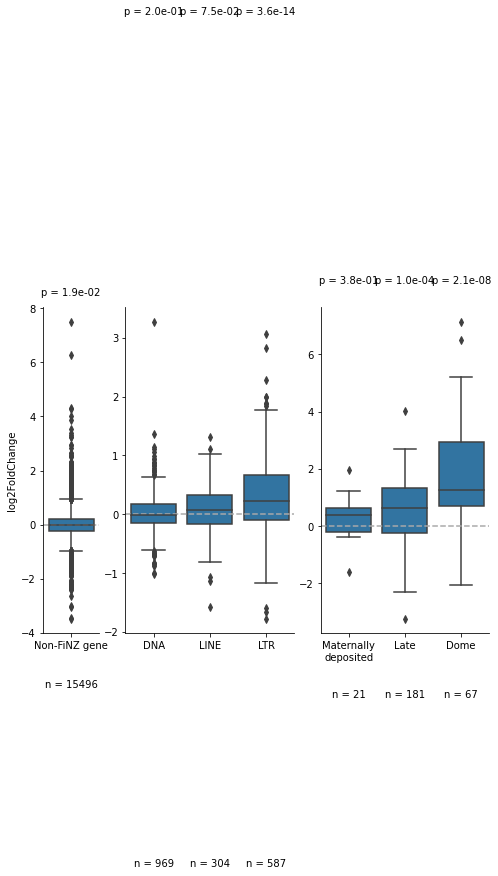

In [6]:
def plot_group(subgroups, df, axes, index):
    sns.boxplot(data=df.loc[(df.labels.isin(subgroups)) & (df.baseMean > 50)], 
            x='labels', 
            y='log2FoldChange', 
            hue='genetype',
            order=subgroups,
            dodge=False,
            ax=axes[index])
    
    for i, group in enumerate(subgroups):
        n = df.loc[df.labels == group].shape[0]
        axes[index].text(s=f'n = {n}', x=i, y=-6, ha='center')
        x = df.loc[(df.labels == group) & (df.direction == 'up-regulated')].shape[0]
        p = stats.binom_test(x=x, n=n, p=0.5)
        axes[index].text(s=f'p = {p:.1e}', x=i, y=8.5, ha='center')
        


fig, axes = plt.subplots(figsize=(8, 6), 
                         ncols=3, 
                         sharey=False,
                         gridspec_kw={'width_ratios': [1, 3, 3]})    

plot_group(['Non-FiNZ gene'], finz_ko_df, axes, 0)
plot_group(['DNA', 'LINE', 'LTR'], finz_ko_df, axes, 1)
plot_group(['Maternally\ndeposited', 'Late', 'Dome'], finz_ko_df, axes, 2)

for i in (0, 1, 2):
    axes[i].axhline(0, 
                    linestyle='--',
                    color='darkgrey')
    axes[i].set_xlabel('')
    # axes[i].set_ylim(-6.5, 8.75)
    if i > 0:
        axes[i].set_ylabel('')
    axes[i].get_legend().remove()
sns.despine()
plt.show()
fig.savefig('../figs/finz_mo_kd.pdf', bbox_inches='tight')

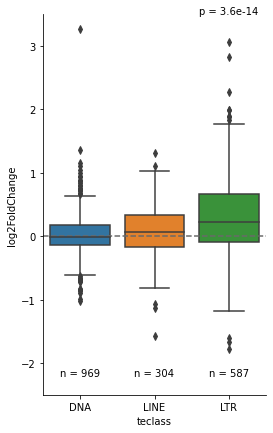

In [7]:
teclasses = ['DNA', 'LINE', 'LTR']
fig, ax = plt.subplots(figsize=(4, 7))
sns.boxplot(data=finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.baseMean > 50)], 
            x='teclass', 
            y='log2FoldChange',
            order=teclasses,
            dodge=False,
            notch=False)

for i, group in enumerate(teclasses):
        n = finz_ko_df.loc[finz_ko_df.labels == group].shape[0]
        ax.text(s=f'n = {n}', x=i, y=-2.2, ha='center')
        x = finz_ko_df.loc[(finz_ko_df.labels == group) & (finz_ko_df.direction == 'up-regulated')].shape[0]
        p = stats.binom_test(x=x, n=n, p=0.5)
        if p < 0.01:
            ax.text(s=f'p = {p:.1e}', x=i, y=3.5, ha='center')

ax.set_ylim((-2.5, 3.5))            
ax.axhline(0, color='dimgrey', ls='--')
sns.despine()
plt.show()
fig.savefig('../figs/finz_mo_te_kd.pdf', bbox_inches='tight')

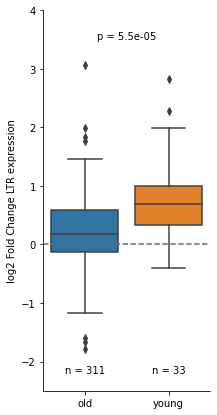

0.17758655288233
0.693920279537318


In [17]:
teclasses = ['LTR']
finz_ko_df['age'] = 'old'
finz_ko_df.loc[finz_ko_df.medlen < 0.01, 'age'] = 'young'

fig, ax = plt.subplots(figsize=(3, 7))
sns.boxplot(data=finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.baseMean > 50)], 
            x='age', 
            y='log2FoldChange',
            dodge=False,
            notch=False)

p = stats.ranksums(finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.age == 'old') & (finz_ko_df.baseMean > 50), 'log2FoldChange'],
                       finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.age == 'young') & (finz_ko_df.baseMean > 50), 'log2FoldChange']).pvalue
ax.text(s=f'p = {p:.1e}', x=0.5, y=3.5, ha='center')
for i, status in enumerate(['old', 'young']):
    n = finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.age == status) & (finz_ko_df.baseMean > 50)].shape[0]
    ax.text(s=f'n = {n}', x=i, y=-2.2, ha='center')

ax.set_ylim((-2.5, 4))
ax.axhline(0, color='dimgrey', ls='--')
ax.set_xlabel('')
ax.set_ylabel('log2 Fold Change LTR expression')
sns.despine()
plt.show()
fig.savefig('../figs/young_vs_old_ltr_fold_change.pdf', bbox_inches='tight')
print(finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.age == 'old') & (finz_ko_df.baseMean > 50), 'log2FoldChange'].median())
print(finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.age == 'young') & (finz_ko_df.baseMean > 50), 'log2FoldChange'].median())

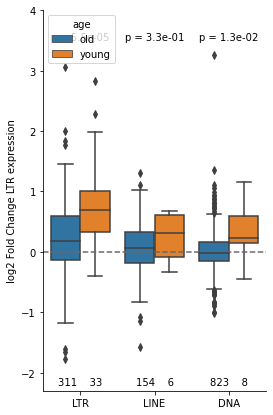

In [14]:
teclasses = ['LTR', 'LINE', 'DNA']

fig, ax = plt.subplots(figsize=(4, 7))
sns.boxplot(data=finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.baseMean > 50)], 
            x='teclass', 
            y='log2FoldChange',
            hue='age',
            order=teclasses,
            dodge=True,
            notch=False)

for i, teclass in enumerate(teclasses):
    p = stats.ranksums(finz_ko_df.loc[(finz_ko_df.teclass == teclass) & (finz_ko_df.age == 'old') & (finz_ko_df.baseMean > 50), 'log2FoldChange'],
                           finz_ko_df.loc[(finz_ko_df.teclass == teclass) & (finz_ko_df.age == 'young') & (finz_ko_df.baseMean > 50), 'log2FoldChange']).pvalue
    ax.text(s=f'p = {p:.1e}', x=i, y=3.5, ha='center')
    oldn = finz_ko_df.loc[(finz_ko_df.teclass == teclass) & (finz_ko_df.age == 'old') & (finz_ko_df.baseMean > 50)].shape[0]
    youngn = finz_ko_df.loc[(finz_ko_df.teclass == teclass) & (finz_ko_df.age == 'young') & (finz_ko_df.baseMean > 50)].shape[0]
    ax.text(s=f'{oldn}    {youngn}', x=i, y=-2.2, ha='center')

ax.set_ylim((-2.3, 4))
ax.axhline(0, color='dimgrey', ls='--')
ax.set_xlabel('')
ax.set_ylabel('log2 Fold Change LTR expression')
sns.despine()
plt.show()
fig.savefig('../figs/young_vs_old_fold_change.pdf', bbox_inches='tight')

In [10]:
finz_ko_df = finz_ko_df.merge(pd.read_csv('../data/te_expression_clusters.txt', sep='\t', index_col=0).reset_index(drop=True), 
                              how='outer',
                              on='gene')
finz_ko_df['expression_stage'] = np.nan
finz_ko_df.loc[finz_ko_df.te_cluster == 'early', 'expression_stage'] = 'early'
finz_ko_df.loc[finz_ko_df.te_cluster == 'late', 'expression_stage'] = 'late'

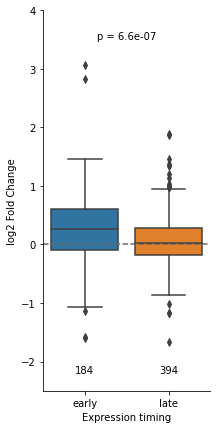

In [346]:
stageorder = ['1-cell', 
             '2-cell', 
             '128-cell', 
             '1k-cell', 
             'Dome', 
             '50pc-epiboly', 
             'Shield', 
             '75pc-epiboly', 
             '1-4-somites', 
             '14-19-somites', 
             '20-25-somites',
             'Prim-5',
             'Prim-15',
             'Prim-25',
             'Long-pec',
             'Protruding-mouth',
             'Day-4',
             'Day-5']


# finz_ko_df['preshield'] = False
# finz_ko_df.loc[finz_ko_df.stageName.isin(['1k-cell', 'Dome', '50pc-epiboly']), 'preshield'] = True
teclasses = ['LTR', 'LINE', 'DNA']
fig, ax = plt.subplots(figsize=(3, 7))
sns.boxplot(data=finz_ko_df.loc[finz_ko_df.teclass.isin(teclasses) & (finz_ko_df.baseMean > 50)], 
            x='expression_stage', 
            y='log2FoldChange')

p = stats.ranksums(finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.expression_stage == 'late') & (finz_ko_df.baseMean > 50), 'log2FoldChange'],
                       finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.expression_stage == 'early') & (finz_ko_df.baseMean > 50), 'log2FoldChange']).pvalue
ax.text(s=f'p = {p:.1e}', x=0.5, y=3.5, ha='center')
earlyn = finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.expression_stage == 'early') & (finz_ko_df.baseMean > 50)].shape[0]
laten = finz_ko_df.loc[(finz_ko_df.teclass.isin(teclasses)) & (finz_ko_df.expression_stage == 'late') & (finz_ko_df.baseMean > 50)].shape[0]
ax.text(s=f'{earlyn}', x=0, y=-2.2, ha='center')
ax.text(s=f'{laten}', x=1, y=-2.2, ha='center')

ax.set_ylim((-2.5, 4))
ax.axhline(0, color='dimgrey', ls='--')
ax.set_xlabel('Expression timing')
ax.set_ylabel('log2 Fold Change')

sns.despine()
plt.show()
fig.savefig('../figs/early_vs_late_fold_change.pdf', bbox_inches='tight')

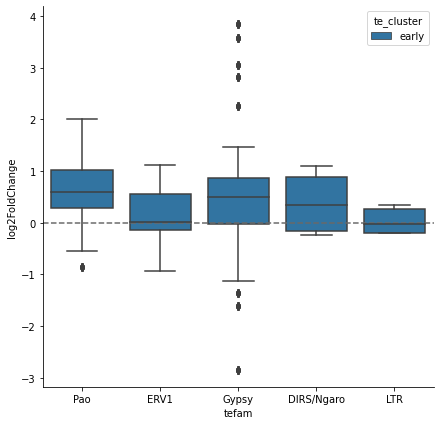

In [16]:
test_df = finz_ko_df.merge(pd.read_csv('../data/te_expression_clusters.txt', sep='\t'), on='gene')
fig, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(data=test_df.loc[(test_df.teclass == 'LTR') & (test_df.te_cluster == 'early')], 
            x='tefam', 
            y='log2FoldChange',
            hue='te_cluster')
ax.axhline(0, color='dimgrey', ls='--')

sns.despine()
plt.show()
# sns.stripplot(data=test_df.loc[(test_df.te_cluster.isin(['early', 'rising', 'late'])) & (test_df.teclass == 'LTR') & (test_df.tefam.isin(ltr_families))], 
#             x='tefam', 
#             y='log2FoldChange',
#             hue='te_cluster',
#             order=ltr_families, dodge=True, linewidth=1)

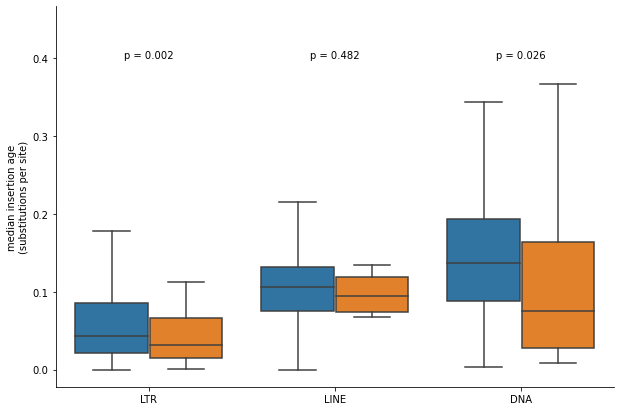

In [22]:
finz_ko_df['sig2'] = False
finz_ko_df.loc[(finz_ko_df.significant) & (finz_ko_df.direction == 'up-regulated'), 'sig2'] = True
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data=finz_ko_df.loc[finz_ko_df.teclass.isin(['LTR', 'LINE', 'DNA'])], 
            x='teclass', 
            y='medlen', 
            hue='sig2',
            order=['LTR', 'LINE', 'DNA'],
            fliersize=0,
            dodge=True,
            notch=False)

for i, teclass in enumerate(['LTR', 'LINE', 'DNA']):
    pval = stats.ranksums(finz_ko_df.loc[(finz_ko_df.sig2) & (finz_ko_df.teclass == teclass), 'medlen'],
                          finz_ko_df.loc[~(finz_ko_df.sig2) & (finz_ko_df.teclass == teclass), 'medlen'])
    ax.text(i, 0.4, f'p = {pval.pvalue:.3f}', ha='center')

ax.get_legend().remove()
ax.set_xlabel('')
ax.set_ylabel('median insertion age\n(substitutions per site)')
sns.despine()
plt.show()

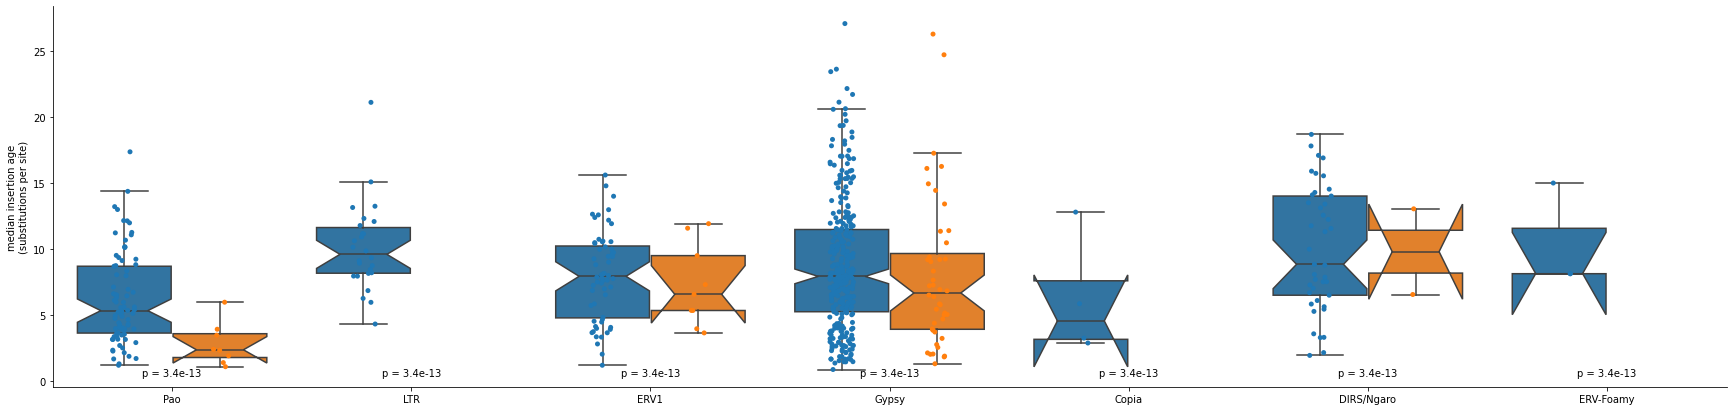

In [25]:
finz_ko_df['sig2'] = False
finz_ko_df.loc[(finz_ko_df.significant) & (finz_ko_df.direction == 'up-regulated'), 'sig2'] = True
fig, ax = plt.subplots(figsize=(30, 7))
sns.boxplot(data=finz_ko_df.loc[finz_ko_df.teclass.isin(['LTR'])], 
            x='tefam', 
            y='meandiv', 
            hue='sig2',
            fliersize=0,
            dodge=True,
            notch=True)
sns.stripplot(data=finz_ko_df.loc[finz_ko_df.teclass.isin(['LTR'])], 
            x='tefam', 
            y='meandiv', 
            hue='sig2',
            # fliersize=0,
            dodge=True)

for i, tefam in enumerate(ltr_families):
    pval = stats.ranksums(finz_ko_df.loc[(finz_ko_df.sig2) & (finz_ko_df.teclass == teclass), 'medlen'],
                          finz_ko_df.loc[~(finz_ko_df.sig2) & (finz_ko_df.teclass == teclass), 'meandiv'])
    ax.text(i, 0.4, f'p = {pval.pvalue:.1e}', ha='center')

ax.get_legend().remove()
ax.set_xlabel('')
ax.set_ylabel('median insertion age\n(substitutions per site)')
sns.despine()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(30, 6))
sns.boxplot(data=finz_ko_df.loc[(finz_ko_df.teclass == 'DNA') & (finz_ko_df.copynum >= 10)], x='tefam', y='enrichment', hue='significant', notch=True)
# ax.set_yscale('log')
print(stats.ranksums(finz_ko_df.loc[(finz_ko_df.teclass == 'LTR') & (finz_ko_df.copynum >= 10) & (finz_ko_df.sig2), 'enrichment'],
                     finz_ko_df.loc[(finz_ko_df.teclass == 'LTR') & (finz_ko_df.copynum >= 10) & ~(finz_ko_df.sig2), 'enrichment']))
sns.despine()
ax.set_yscale('log')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(30, 6))
sns.scatterplot(data=finz_ko_df, x='enrichment', y='medlen')
ax.set_xscale('log')
ax.set_yscale('log')
stats.spearmanr(finz_ko_df.enrichment, finz_ko_df.medlen, nan_policy='omit')

In [ ]:
print(finz_ko_df.loc[(finz_ko_df.sig2) & (finz_ko_df.genetype == 'TE') & (finz_ko_df.log2FoldChange > 2)] \
      .sort_values('padj')[['gene', 'log2FoldChange', 'copynum', 'medlen', 'meandiv', 'preshield']] \
      .head(20))
